# grn bench perturb seq


In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_perturb_gt

from bengrn.base import train_classifier

from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

import scanpy as sc

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
adata = get_perturb_gt()

adata.var["isTF"] = False
adata.var.loc[adata.var.gene_name.isin(grnutils.TF), "isTF"] = True
adata.var["isTF"].sum()
metrics = {}

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gem_group' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene_id' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/uti

In [3]:
preprocessor = Preprocessor(force_preprocess=True, skip_validate=True,
                            do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)
nadata = preprocessor(adata.copy())
adata

Dropping layers:  KeysView(Layers with keys: )
checking raw counts


removed 0 non primary cells, 10691 renamining


filtered out 0 cells, 10691 renamining
Removed 8 genes.


startin QC


Seeing 10068 outliers (94.17% of total dataset):
done


GRnnData object with n_obs × n_vars = 10691 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'organism_ontology_term_id'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'isTF'
    varp: 'GRN'
    with a grn of 1115065 elements

In [4]:
model = scPrint.load_from_checkpoint(
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/wli32e2j/last.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb=None)
#    '../data/temp/25eer0xz/epoch=20-step=105000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
NUM_CELLS = 1024
metrics = {}

2024-06-28 17:20:29,060:INFO - Created a temporary directory at /local/scratch/tmp/tmplt0pxqsd


2024-06-28 17:20:29,061:INFO - Writing /local/scratch/tmp/tmplt0pxqsd/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [5]:
grn_inferer = GRNfer(model, nadata[nadata.X.sum(1) > 500],
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     num_genes=NUM_GENES,
                     max_cells=NUM_CELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp['all'] = grn.varp["GRN"]

/local/scratch/tmp/ipykernel_3848834/2255780205.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],


Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 8555


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

precision:  0.02072508763433421 
recall:  1.0 
random precision: 0.02072944989230818


  0%|          | 0/128 [00:00<?, ?it/s]

  2%|▏         | 3/128 [00:00<00:05, 22.38it/s]

  5%|▍         | 6/128 [00:00<00:05, 22.22it/s]

  7%|▋         | 9/128 [00:00<00:05, 22.22it/s]

  9%|▉         | 12/128 [00:00<00:05, 22.26it/s]

 12%|█▏        | 15/128 [00:00<00:05, 22.26it/s]

 14%|█▍        | 18/128 [00:00<00:04, 22.27it/s]

 16%|█▋        | 21/128 [00:00<00:04, 22.25it/s]

 19%|█▉        | 24/128 [00:01<00:04, 22.19it/s]

 21%|██        | 27/128 [00:01<00:04, 22.08it/s]

 23%|██▎       | 30/128 [00:01<00:04, 22.12it/s]

 26%|██▌       | 33/128 [00:01<00:04, 22.16it/s]

 28%|██▊       | 36/128 [00:01<00:04, 22.16it/s]

 30%|███       | 39/128 [00:01<00:04, 22.17it/s]

 33%|███▎      | 42/128 [00:01<00:03, 22.18it/s]

 35%|███▌      | 45/128 [00:02<00:03, 22.21it/s]

 38%|███▊      | 48/128 [00:02<00:03, 22.25it/s]

 40%|███▉      | 51/128 [00:02<00:03, 22.26it/s]

 42%|████▏     | 54/128 [00:02<00:03, 22.24it/s]

 45%|████▍     | 57/128 [00:02<00:03, 22.26it/s]

 47%|████▋     | 60/128 [00:02<00:03, 22.26it/s]

 49%|████▉     | 63/128 [00:02<00:02, 22.24it/s]

 52%|█████▏    | 66/128 [00:02<00:02, 22.25it/s]

 54%|█████▍    | 69/128 [00:03<00:02, 22.29it/s]

 56%|█████▋    | 72/128 [00:03<00:02, 22.27it/s]

 59%|█████▊    | 75/128 [00:03<00:02, 22.29it/s]

 61%|██████    | 78/128 [00:03<00:02, 22.29it/s]

 63%|██████▎   | 81/128 [00:03<00:02, 22.27it/s]

 66%|██████▌   | 84/128 [00:03<00:01, 22.29it/s]

 68%|██████▊   | 87/128 [00:03<00:01, 22.28it/s]

 70%|███████   | 90/128 [00:04<00:01, 22.12it/s]

 73%|███████▎  | 93/128 [00:04<00:01, 22.15it/s]

 75%|███████▌  | 96/128 [00:04<00:01, 22.17it/s]

 77%|███████▋  | 99/128 [00:04<00:01, 22.18it/s]

 80%|███████▉  | 102/128 [00:04<00:01, 22.18it/s]

 82%|████████▏ | 105/128 [00:04<00:01, 22.22it/s]

 84%|████████▍ | 108/128 [00:04<00:00, 22.25it/s]

 87%|████████▋ | 111/128 [00:04<00:00, 22.27it/s]

 89%|████████▉ | 114/128 [00:05<00:00, 22.27it/s]

 91%|█████████▏| 117/128 [00:05<00:00, 22.28it/s]

 94%|█████████▍| 120/128 [00:05<00:00, 22.31it/s]

 96%|█████████▌| 123/128 [00:05<00:00, 22.32it/s]

 98%|█████████▊| 126/128 [00:05<00:00, 22.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:05<00:00, 22.23it/s]

Area Under Precision-Recall Curve (AUPRC):  0.02294818659868724
EPR: 1.1037569127778373


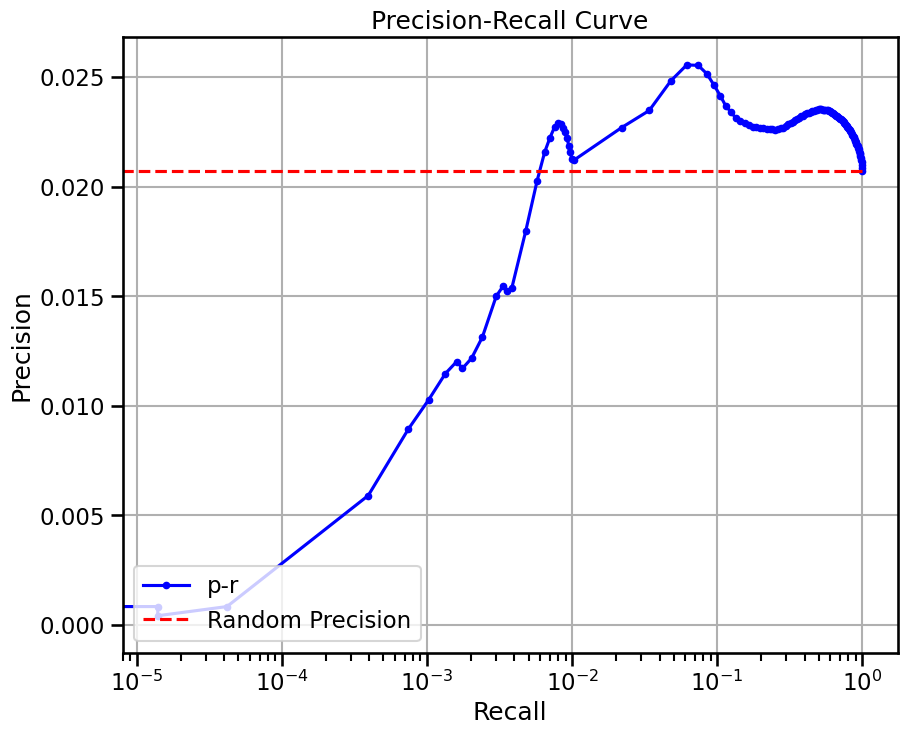

In [6]:
grn.varp['GRN'] = grn.varp["all"].mean(-1)
metrics['scprint_mean_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

true elem 17394 ...


doing classification....


metrics {'used_heads': 105, 'precision': 0.004637297118251077, 'random_precision': 0.001610562441384053, 'recall': 0.008144269924374637, 'predicted_true': 3019.0, 'number_of_true': 1719.0, 'epr': 3.2745460141582026}


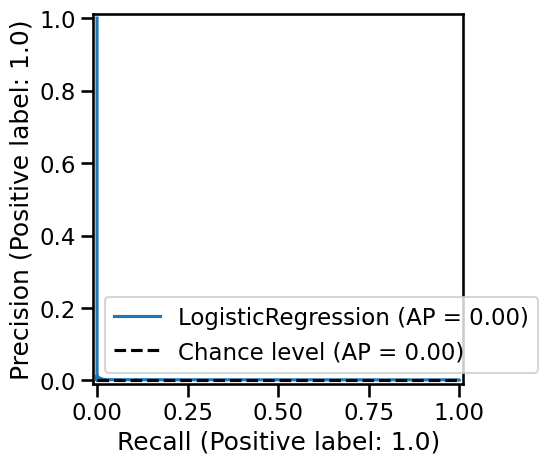

precision:  0.02072508763433421 
recall:  1.0 
random precision: 0.02072944989230818


  0%|          | 0/128 [00:00<?, ?it/s]

  2%|▏         | 2/128 [00:00<00:07, 17.97it/s]

  3%|▎         | 4/128 [00:00<00:06, 17.98it/s]

  5%|▍         | 6/128 [00:00<00:06, 17.99it/s]

  6%|▋         | 8/128 [00:00<00:06, 18.02it/s]

  8%|▊         | 10/128 [00:00<00:06, 18.00it/s]

  9%|▉         | 12/128 [00:00<00:06, 17.99it/s]

 11%|█         | 14/128 [00:00<00:06, 17.98it/s]

 12%|█▎        | 16/128 [00:00<00:06, 18.00it/s]

 14%|█▍        | 18/128 [00:01<00:06, 18.00it/s]

 16%|█▌        | 20/128 [00:01<00:06, 18.00it/s]

 17%|█▋        | 22/128 [00:01<00:05, 18.00it/s]

 19%|█▉        | 24/128 [00:01<00:05, 17.99it/s]

 20%|██        | 26/128 [00:01<00:05, 18.01it/s]

 22%|██▏       | 28/128 [00:01<00:05, 18.00it/s]

 23%|██▎       | 30/128 [00:01<00:05, 18.01it/s]

 25%|██▌       | 32/128 [00:01<00:05, 17.95it/s]

 27%|██▋       | 34/128 [00:01<00:05, 17.79it/s]

 28%|██▊       | 36/128 [00:02<00:05, 17.84it/s]

 30%|██▉       | 38/128 [00:02<00:05, 17.87it/s]

 31%|███▏      | 40/128 [00:02<00:04, 17.88it/s]

 33%|███▎      | 42/128 [00:02<00:04, 17.90it/s]

 34%|███▍      | 44/128 [00:02<00:04, 17.91it/s]

 36%|███▌      | 46/128 [00:02<00:04, 17.94it/s]

 38%|███▊      | 48/128 [00:02<00:04, 17.96it/s]

 39%|███▉      | 50/128 [00:02<00:04, 17.99it/s]

 41%|████      | 52/128 [00:02<00:04, 18.02it/s]

 42%|████▏     | 54/128 [00:03<00:04, 18.04it/s]

 44%|████▍     | 56/128 [00:03<00:03, 18.04it/s]

 45%|████▌     | 58/128 [00:03<00:03, 18.06it/s]

 47%|████▋     | 60/128 [00:03<00:03, 18.08it/s]

 48%|████▊     | 62/128 [00:03<00:03, 18.08it/s]

 50%|█████     | 64/128 [00:03<00:03, 18.08it/s]

 52%|█████▏    | 66/128 [00:03<00:03, 18.09it/s]

 53%|█████▎    | 68/128 [00:03<00:03, 18.08it/s]

 55%|█████▍    | 70/128 [00:03<00:03, 18.08it/s]

 56%|█████▋    | 72/128 [00:04<00:03, 18.09it/s]

 58%|█████▊    | 74/128 [00:04<00:02, 18.09it/s]

 59%|█████▉    | 76/128 [00:04<00:02, 18.09it/s]

 61%|██████    | 78/128 [00:04<00:02, 18.10it/s]

 62%|██████▎   | 80/128 [00:04<00:02, 18.08it/s]

 64%|██████▍   | 82/128 [00:04<00:02, 18.07it/s]

 66%|██████▌   | 84/128 [00:04<00:02, 18.01it/s]

 67%|██████▋   | 86/128 [00:04<00:02, 17.88it/s]

 69%|██████▉   | 88/128 [00:04<00:02, 17.86it/s]

 70%|███████   | 90/128 [00:05<00:02, 17.89it/s]

 72%|███████▏  | 92/128 [00:05<00:02, 17.93it/s]

 73%|███████▎  | 94/128 [00:05<00:01, 17.94it/s]

 75%|███████▌  | 96/128 [00:05<00:01, 17.96it/s]

 77%|███████▋  | 98/128 [00:05<00:01, 17.99it/s]

 78%|███████▊  | 100/128 [00:05<00:01, 17.98it/s]

 80%|███████▉  | 102/128 [00:05<00:01, 17.97it/s]

 81%|████████▏ | 104/128 [00:05<00:01, 17.96it/s]

 83%|████████▎ | 106/128 [00:05<00:01, 17.98it/s]

 84%|████████▍ | 108/128 [00:06<00:01, 17.98it/s]

 86%|████████▌ | 110/128 [00:06<00:01, 17.96it/s]

 88%|████████▊ | 112/128 [00:06<00:00, 17.96it/s]

 89%|████████▉ | 114/128 [00:06<00:00, 17.95it/s]

 91%|█████████ | 116/128 [00:06<00:00, 17.97it/s]

 92%|█████████▏| 118/128 [00:06<00:00, 17.98it/s]

 94%|█████████▍| 120/128 [00:06<00:00, 17.98it/s]

 95%|█████████▌| 122/128 [00:06<00:00, 18.00it/s]

 97%|█████████▋| 124/128 [00:06<00:00, 18.00it/s]

 98%|█████████▊| 126/128 [00:07<00:00, 18.00it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:07<00:00, 17.99it/s]

100%|██████████| 128/128 [00:07<00:00, 17.99it/s]

Area Under Precision-Recall Curve (AUPRC):  0.020766522343209484
EPR: 0.7488938507236744


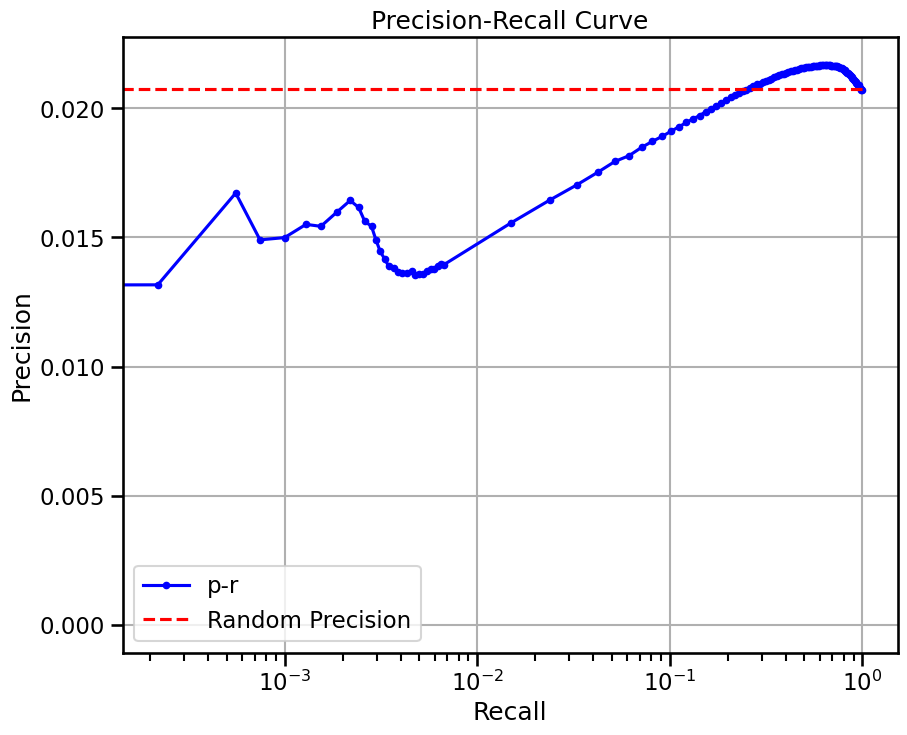

In [7]:
grn.varp['GRN'] = grn.varp["all"]
grn, m, clf_omni = train_classifier(grn, C=0.1, train_size=0.9, class_weight={
                                    1: 200, 0: 1}, shuffle=True, use_col="gene_name")
grn.varp['GRN'] = grn.varp['classified']

metrics['scprint_omni_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)


pred shape (2920, 4752, 128)
true elem 287578 ...


doing classification....


metrics {'used_heads': 121, 'precision': 0.06303946283151915, 'random_precision': 0.02150860776716941, 'recall': 0.21818730105545317, 'predicted_true': 516486, 'number_of_true': 149225, 'epr': 5.035195966522557}


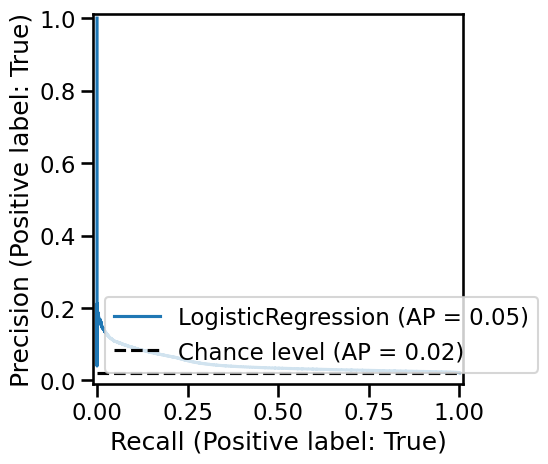

In [8]:
grn.varp['GRN'] = grn.varp['all']
grn.var['ensembl_id'] = grn.var.index
grn, m, clf_self = train_classifier(grn, other=adata, C=0.8, train_size=0.5, class_weight={
                               1: 30, 0: 1}, shuffle=False, use_col="ensembl_id")
grn.varp['GRN'] = grn.varp['classified']

precision:  0.02072508763433421 
recall:  1.0 
random precision: 0.02072944989230818


  0%|          | 0/128 [00:00<?, ?it/s]

  2%|▏         | 2/128 [00:00<00:07, 17.89it/s]

  3%|▎         | 4/128 [00:00<00:06, 17.85it/s]

  5%|▍         | 6/128 [00:00<00:06, 17.82it/s]

  6%|▋         | 8/128 [00:00<00:06, 17.82it/s]

  8%|▊         | 10/128 [00:00<00:06, 17.82it/s]

  9%|▉         | 12/128 [00:00<00:06, 17.84it/s]

 11%|█         | 14/128 [00:00<00:06, 17.81it/s]

 12%|█▎        | 16/128 [00:00<00:06, 17.81it/s]

 14%|█▍        | 18/128 [00:01<00:06, 17.82it/s]

 16%|█▌        | 20/128 [00:01<00:06, 17.84it/s]

 17%|█▋        | 22/128 [00:01<00:05, 17.85it/s]

 19%|█▉        | 24/128 [00:01<00:05, 17.82it/s]

 20%|██        | 26/128 [00:01<00:05, 17.78it/s]

 22%|██▏       | 28/128 [00:01<00:05, 17.80it/s]

 23%|██▎       | 30/128 [00:01<00:05, 17.87it/s]

 25%|██▌       | 32/128 [00:01<00:05, 17.93it/s]

 27%|██▋       | 34/128 [00:01<00:05, 17.96it/s]

 28%|██▊       | 36/128 [00:02<00:05, 17.99it/s]

 30%|██▉       | 38/128 [00:02<00:04, 18.02it/s]

 31%|███▏      | 40/128 [00:02<00:04, 18.04it/s]

 33%|███▎      | 42/128 [00:02<00:04, 18.06it/s]

 34%|███▍      | 44/128 [00:02<00:04, 18.07it/s]

 36%|███▌      | 46/128 [00:02<00:04, 18.07it/s]

 38%|███▊      | 48/128 [00:02<00:04, 18.08it/s]

 39%|███▉      | 50/128 [00:02<00:04, 18.09it/s]

 41%|████      | 52/128 [00:02<00:04, 18.09it/s]

 42%|████▏     | 54/128 [00:03<00:04, 18.10it/s]

 44%|████▍     | 56/128 [00:03<00:03, 18.10it/s]

 45%|████▌     | 58/128 [00:03<00:03, 18.10it/s]

 47%|████▋     | 60/128 [00:03<00:03, 18.08it/s]

 48%|████▊     | 62/128 [00:03<00:03, 18.11it/s]

 50%|█████     | 64/128 [00:03<00:03, 18.10it/s]

 52%|█████▏    | 66/128 [00:03<00:03, 18.11it/s]

 53%|█████▎    | 68/128 [00:03<00:03, 18.07it/s]

 55%|█████▍    | 70/128 [00:03<00:03, 18.08it/s]

 56%|█████▋    | 72/128 [00:04<00:03, 18.08it/s]

 58%|█████▊    | 74/128 [00:04<00:02, 18.09it/s]

 59%|█████▉    | 76/128 [00:04<00:02, 18.04it/s]

 61%|██████    | 78/128 [00:04<00:02, 17.91it/s]

 62%|██████▎   | 80/128 [00:04<00:02, 17.95it/s]

 64%|██████▍   | 82/128 [00:04<00:02, 17.99it/s]

 66%|██████▌   | 84/128 [00:04<00:02, 18.01it/s]

 67%|██████▋   | 86/128 [00:04<00:02, 18.03it/s]

 69%|██████▉   | 88/128 [00:04<00:02, 18.05it/s]

 70%|███████   | 90/128 [00:05<00:02, 18.05it/s]

 72%|███████▏  | 92/128 [00:05<00:01, 18.05it/s]

 73%|███████▎  | 94/128 [00:05<00:01, 18.05it/s]

 75%|███████▌  | 96/128 [00:05<00:01, 18.04it/s]

 77%|███████▋  | 98/128 [00:05<00:01, 18.03it/s]

 78%|███████▊  | 100/128 [00:05<00:01, 18.04it/s]

 80%|███████▉  | 102/128 [00:05<00:01, 18.03it/s]

 81%|████████▏ | 104/128 [00:05<00:01, 18.03it/s]

 83%|████████▎ | 106/128 [00:05<00:01, 18.03it/s]

 84%|████████▍ | 108/128 [00:06<00:01, 18.04it/s]

 86%|████████▌ | 110/128 [00:06<00:00, 18.03it/s]

 88%|████████▊ | 112/128 [00:06<00:00, 18.03it/s]

 89%|████████▉ | 114/128 [00:06<00:00, 18.02it/s]

 91%|█████████ | 116/128 [00:06<00:00, 18.03it/s]

 92%|█████████▏| 118/128 [00:06<00:00, 18.01it/s]

 94%|█████████▍| 120/128 [00:06<00:00, 17.95it/s]

 95%|█████████▌| 122/128 [00:06<00:00, 17.97it/s]

 97%|█████████▋| 124/128 [00:06<00:00, 17.99it/s]

 98%|█████████▊| 126/128 [00:07<00:00, 18.01it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:07<00:00, 17.96it/s]

100%|██████████| 128/128 [00:07<00:00, 17.99it/s]

Area Under Precision-Recall Curve (AUPRC):  0.04312191613865064


EPR: 4.830784580222353


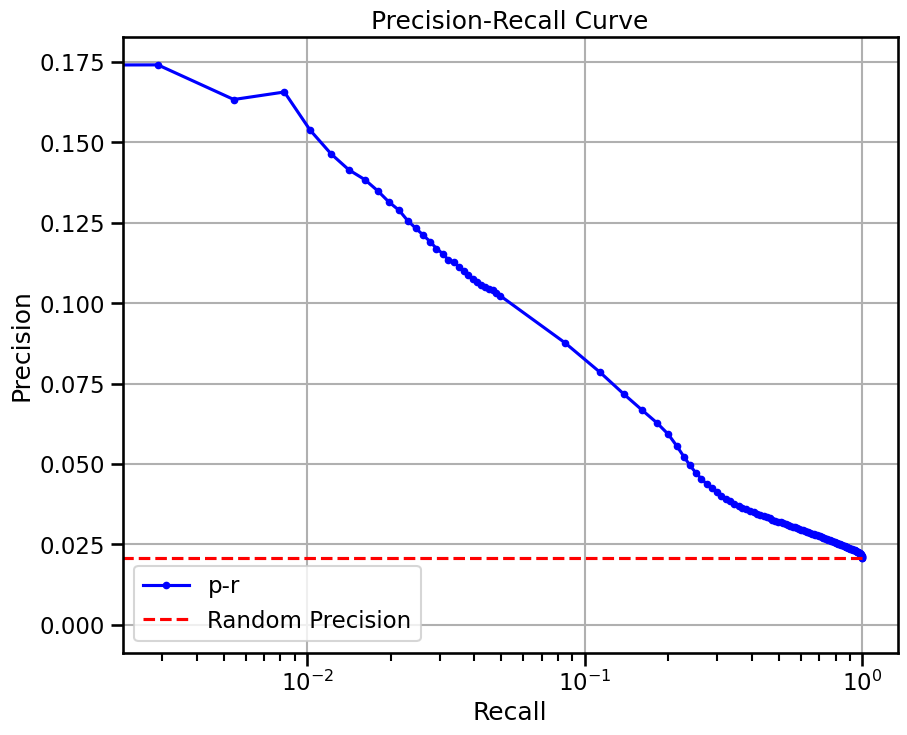

In [9]:
metrics['scprint_self_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

/local/scratch/tmp/ipykernel_3848834/3952340977.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 90992521, sparsity: 1.0


precision:  0.024385833256147023 
recall:  1.0 
random precision: 0.02438880351598334


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:17,  7.33it/s]

  2%|▏         | 2/128 [00:00<00:17,  7.38it/s]

  2%|▏         | 3/128 [00:00<00:17,  7.33it/s]

  3%|▎         | 4/128 [00:00<00:16,  7.35it/s]

  4%|▍         | 5/128 [00:00<00:16,  7.34it/s]

  5%|▍         | 6/128 [00:00<00:16,  7.30it/s]

  5%|▌         | 7/128 [00:00<00:16,  7.31it/s]

  6%|▋         | 8/128 [00:01<00:16,  7.29it/s]

  7%|▋         | 9/128 [00:01<00:16,  7.29it/s]

  8%|▊         | 10/128 [00:01<00:16,  7.32it/s]

  9%|▊         | 11/128 [00:01<00:16,  7.31it/s]

  9%|▉         | 12/128 [00:01<00:15,  7.31it/s]

 10%|█         | 13/128 [00:01<00:15,  7.31it/s]

 11%|█         | 14/128 [00:01<00:15,  7.30it/s]

 12%|█▏        | 15/128 [00:02<00:15,  7.28it/s]

 12%|█▎        | 16/128 [00:02<00:15,  7.27it/s]

 13%|█▎        | 17/128 [00:02<00:15,  7.29it/s]

 14%|█▍        | 18/128 [00:02<00:15,  7.30it/s]

 15%|█▍        | 19/128 [00:02<00:14,  7.28it/s]

 16%|█▌        | 20/128 [00:02<00:14,  7.28it/s]

 16%|█▋        | 21/128 [00:02<00:14,  7.30it/s]

 17%|█▋        | 22/128 [00:03<00:14,  7.29it/s]

 18%|█▊        | 23/128 [00:03<00:14,  7.31it/s]

 19%|█▉        | 24/128 [00:03<00:14,  7.31it/s]

 20%|█▉        | 25/128 [00:03<00:14,  7.30it/s]

 20%|██        | 26/128 [00:03<00:14,  7.28it/s]

 21%|██        | 27/128 [00:03<00:13,  7.29it/s]

 22%|██▏       | 28/128 [00:03<00:13,  7.30it/s]

 23%|██▎       | 29/128 [00:03<00:13,  7.28it/s]

 23%|██▎       | 30/128 [00:04<00:13,  7.31it/s]

 24%|██▍       | 31/128 [00:04<00:13,  7.31it/s]

 25%|██▌       | 32/128 [00:04<00:13,  7.31it/s]

 26%|██▌       | 33/128 [00:04<00:12,  7.31it/s]

 27%|██▋       | 34/128 [00:04<00:12,  7.31it/s]

 27%|██▋       | 35/128 [00:04<00:12,  7.30it/s]

 28%|██▊       | 36/128 [00:04<00:12,  7.32it/s]

 29%|██▉       | 37/128 [00:05<00:12,  7.32it/s]

 30%|██▉       | 38/128 [00:05<00:12,  7.32it/s]

 30%|███       | 39/128 [00:05<00:12,  7.29it/s]

 31%|███▏      | 40/128 [00:05<00:12,  7.28it/s]

 32%|███▏      | 41/128 [00:05<00:11,  7.30it/s]

 33%|███▎      | 42/128 [00:05<00:11,  7.28it/s]

 34%|███▎      | 43/128 [00:05<00:11,  7.25it/s]

 34%|███▍      | 44/128 [00:06<00:11,  7.28it/s]

 35%|███▌      | 45/128 [00:06<00:11,  7.27it/s]

 36%|███▌      | 46/128 [00:06<00:11,  7.29it/s]

 37%|███▋      | 47/128 [00:06<00:11,  7.31it/s]

 38%|███▊      | 48/128 [00:06<00:10,  7.32it/s]

 38%|███▊      | 49/128 [00:06<00:10,  7.34it/s]

 39%|███▉      | 50/128 [00:06<00:10,  7.33it/s]

 40%|███▉      | 51/128 [00:06<00:10,  7.30it/s]

 41%|████      | 52/128 [00:07<00:10,  7.34it/s]

 41%|████▏     | 53/128 [00:07<00:10,  7.33it/s]

 42%|████▏     | 54/128 [00:07<00:10,  7.31it/s]

 43%|████▎     | 55/128 [00:07<00:09,  7.30it/s]

 44%|████▍     | 56/128 [00:07<00:09,  7.29it/s]

 45%|████▍     | 57/128 [00:07<00:09,  7.29it/s]

 45%|████▌     | 58/128 [00:07<00:09,  7.30it/s]

 46%|████▌     | 59/128 [00:08<00:09,  7.32it/s]

 47%|████▋     | 60/128 [00:08<00:09,  7.30it/s]

 48%|████▊     | 61/128 [00:08<00:09,  7.29it/s]

 48%|████▊     | 62/128 [00:08<00:09,  7.27it/s]

 49%|████▉     | 63/128 [00:08<00:08,  7.29it/s]

 50%|█████     | 64/128 [00:08<00:08,  7.27it/s]

 51%|█████     | 65/128 [00:08<00:08,  7.30it/s]

 52%|█████▏    | 66/128 [00:09<00:08,  7.31it/s]

 52%|█████▏    | 67/128 [00:09<00:08,  7.31it/s]

 53%|█████▎    | 68/128 [00:09<00:08,  7.31it/s]

 54%|█████▍    | 69/128 [00:09<00:08,  7.33it/s]

 55%|█████▍    | 70/128 [00:09<00:07,  7.32it/s]

 55%|█████▌    | 71/128 [00:09<00:07,  7.32it/s]

 56%|█████▋    | 72/128 [00:09<00:07,  7.30it/s]

 57%|█████▋    | 73/128 [00:09<00:07,  7.30it/s]

 58%|█████▊    | 74/128 [00:10<00:07,  7.30it/s]

 59%|█████▊    | 75/128 [00:10<00:07,  7.29it/s]

 59%|█████▉    | 76/128 [00:10<00:07,  7.27it/s]

 60%|██████    | 77/128 [00:10<00:07,  7.25it/s]

 61%|██████    | 78/128 [00:10<00:06,  7.26it/s]

 62%|██████▏   | 79/128 [00:10<00:06,  7.24it/s]

 62%|██████▎   | 80/128 [00:10<00:06,  7.27it/s]

 63%|██████▎   | 81/128 [00:11<00:06,  7.25it/s]

 64%|██████▍   | 82/128 [00:11<00:06,  7.23it/s]

 65%|██████▍   | 83/128 [00:11<00:06,  7.23it/s]

 66%|██████▌   | 84/128 [00:11<00:06,  7.27it/s]

 66%|██████▋   | 85/128 [00:11<00:05,  7.26it/s]

 67%|██████▋   | 86/128 [00:11<00:05,  7.27it/s]

 68%|██████▊   | 87/128 [00:11<00:05,  7.26it/s]

 69%|██████▉   | 88/128 [00:12<00:05,  7.27it/s]

 70%|██████▉   | 89/128 [00:12<00:05,  7.28it/s]

 70%|███████   | 90/128 [00:12<00:05,  7.29it/s]

 71%|███████   | 91/128 [00:12<00:05,  7.28it/s]

 72%|███████▏  | 92/128 [00:12<00:04,  7.31it/s]

 73%|███████▎  | 93/128 [00:12<00:04,  7.32it/s]

 73%|███████▎  | 94/128 [00:12<00:04,  7.32it/s]

 74%|███████▍  | 95/128 [00:13<00:04,  7.32it/s]

 75%|███████▌  | 96/128 [00:13<00:04,  7.31it/s]

 76%|███████▌  | 97/128 [00:13<00:04,  7.32it/s]

 77%|███████▋  | 98/128 [00:13<00:04,  7.31it/s]

 77%|███████▋  | 99/128 [00:13<00:03,  7.29it/s]

 78%|███████▊  | 100/128 [00:13<00:03,  7.29it/s]

 79%|███████▉  | 101/128 [00:13<00:04,  6.26it/s]

 80%|███████▉  | 102/128 [00:14<00:03,  6.51it/s]

 80%|████████  | 103/128 [00:14<00:03,  6.72it/s]

 81%|████████▏ | 104/128 [00:14<00:03,  6.87it/s]

 82%|████████▏ | 105/128 [00:14<00:03,  6.98it/s]

 83%|████████▎ | 106/128 [00:14<00:03,  7.05it/s]

 84%|████████▎ | 107/128 [00:14<00:02,  7.15it/s]

 84%|████████▍ | 108/128 [00:14<00:02,  7.20it/s]

 85%|████████▌ | 109/128 [00:15<00:02,  7.27it/s]

 86%|████████▌ | 110/128 [00:15<00:02,  7.28it/s]

 87%|████████▋ | 111/128 [00:15<00:02,  7.27it/s]

 88%|████████▊ | 112/128 [00:15<00:02,  7.27it/s]

 88%|████████▊ | 113/128 [00:15<00:02,  7.30it/s]

 89%|████████▉ | 114/128 [00:15<00:01,  7.30it/s]

 90%|████████▉ | 115/128 [00:15<00:01,  7.29it/s]

 91%|█████████ | 116/128 [00:15<00:01,  7.25it/s]

 91%|█████████▏| 117/128 [00:16<00:01,  7.24it/s]

 92%|█████████▏| 118/128 [00:16<00:01,  7.25it/s]

 93%|█████████▎| 119/128 [00:16<00:01,  7.28it/s]

 94%|█████████▍| 120/128 [00:16<00:01,  7.28it/s]

 95%|█████████▍| 121/128 [00:16<00:00,  7.28it/s]

 95%|█████████▌| 122/128 [00:16<00:00,  7.23it/s]

 96%|█████████▌| 123/128 [00:16<00:00,  7.22it/s]

 97%|█████████▋| 124/128 [00:17<00:00,  7.22it/s]

 98%|█████████▊| 125/128 [00:17<00:00,  7.25it/s]

 98%|█████████▊| 126/128 [00:17<00:00,  7.27it/s]

 99%|█████████▉| 127/128 [00:17<00:00,  7.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:17<00:00,  7.27it/s]

100%|██████████| 128/128 [00:17<00:00,  7.26it/s]

Area Under Precision-Recall Curve (AUPRC):  0.027199860444052093


EPR: 0.9372569118652017


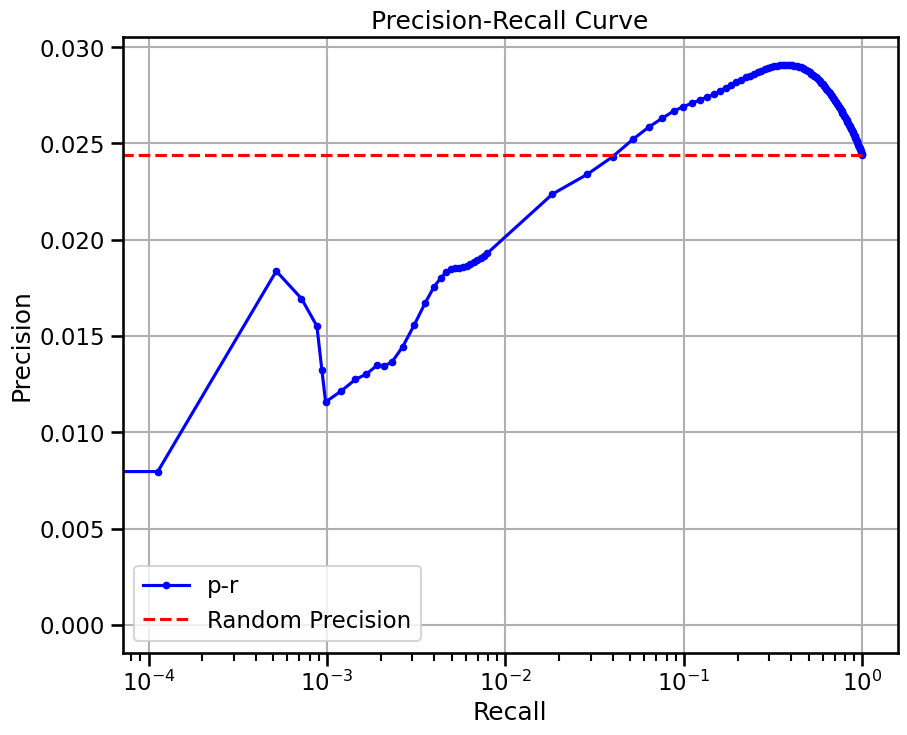

In [10]:
grn_inferer = GRNfer(model, nadata[nadata.X.sum(1) > 500],
                     how="random expr",
                     preprocess="softmax",
                     head_agg='mean',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     num_genes=3000,
                     max_cells=NUM_CELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
metrics["scprint_full_perturb"] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

In [11]:
metrics

{'scprint_mean_perturb': {'precision': 0.02072508763433421,
  'recall': 1.0,
  'rand_precision': 0.02072944989230818,
  'auprc': 0.02294818659868724,
  'epr': 1.1037569127778373},
 'scprint_omni_perturb': {'precision': 0.02072508763433421,
  'recall': 1.0,
  'rand_precision': 0.02072944989230818,
  'auprc': 0.020766522343209484,
  'epr': 0.7488938507236744},
 'scprint_self_perturb': {'precision': 0.02072508763433421,
  'recall': 1.0,
  'rand_precision': 0.02072944989230818,
  'auprc': 0.04312191613865064,
  'epr': 4.830784580222353},
 'scprint_full_perturb': {'precision': 0.024385833256147023,
  'recall': 1.0,
  'rand_precision': 0.02438880351598334,
  'auprc': 0.027199860444052093,
  'epr': 0.9372569118652017}}

In [12]:
import pandas as pd

In [13]:
res = []
res2 = []
for k, v in metrics.items():
    if k.split('_')[-1] == "base":
        res2.append([k.split('_')[-2], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])
    else:
        res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_only'])
df2 = pd.DataFrame(res2, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_only
0,perturb,1.103757,0.022948,0.020729,False
1,perturb,0.748894,0.020767,0.020729,False
2,perturb,4.830785,0.043122,0.020729,False
3,perturb,0.937257,0.027200,0.024389,False


In [14]:
df2

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
